In [2]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

In [3]:
data = pd.read_csv('data/train-balanced-sarcasm.csv')
data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [4]:
df = data[['label', 'comment']].dropna()
df

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.
...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...
1010822,1,"whatever you do, don't vote green!"
1010823,1,Perhaps this is an atheist conspiracy to make ...
1010824,1,The Slavs got their own country - it is called...


In [5]:
comments = df['comment'].to_numpy()
targets = df['label'].to_numpy()

comments = np.array(comments)
targets = np.array(targets)

In [6]:
token = Tokenizer()
token.fit_on_texts(comments)
word_index=token.word_index
len(word_index)

180583

In [7]:
def word_to_seq(s):
    return tf.keras.preprocessing.sequence.pad_sequences(token.texts_to_sequences([s]), maxlen=maxlen)

In [8]:
maxlen=max([len(i.split()) for i in comments])
print(maxlen)
train_data = word_to_seq(comments.tolist())
input_size = len(train_data)
train_data = np.array(train_data)
total=len(word_index)
print(train_data.shape[1])

2222
2222


In [12]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(total, 128, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
        tf.keras.layers.Dropout(0.1), 
        tf.keras.layers.Dense(512, activation='softmax'),
        tf.keras.layers.Dropout(0.1), 
        tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2222, 128)         23114624  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               788480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 24,166,786
Trainable params: 24,166,786
Non-trainable params: 0
__________________________________________

In [13]:

history=model.fit(train_data[0], targets, epochs=10, validation_split=0.2)

Epoch 1/10
56/56 [==============================] - 17s 298ms/step - loss: 0.6496 - accuracy: 0.8965 - val_loss: 0.6129 - val_accuracy: 0.8697
Epoch 2/10
56/56 [==============================] - 16s 287ms/step - loss: 0.5468 - accuracy: 0.9128 - val_loss: 0.5147 - val_accuracy: 0.8697
Epoch 3/10
56/56 [==============================] - 16s 290ms/step - loss: 0.4288 - accuracy: 0.9128 - val_loss: 0.4555 - val_accuracy: 0.8697
Epoch 4/10
56/56 [==============================] - 16s 288ms/step - loss: 0.3513 - accuracy: 0.9128 - val_loss: 0.4276 - val_accuracy: 0.8697
Epoch 5/10
56/56 [==============================] - 16s 288ms/step - loss: 0.3067 - accuracy: 0.9128 - val_loss: 0.4150 - val_accuracy: 0.8697
Epoch 6/10
56/56 [==============================] - 16s 290ms/step - loss: 0.2711 - accuracy: 0.9409 - val_loss: 0.4095 - val_accuracy: 0.8584
Epoch 7/10
56/56 [==============================] - 16s 290ms/step - loss: 0.2488 - accuracy: 0.9533 - val_loss: 0.4031 - val_accuracy: 0.8562

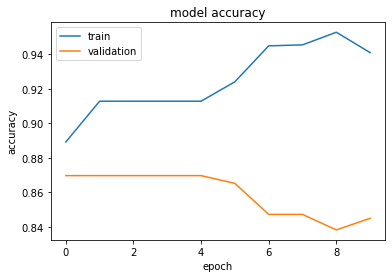

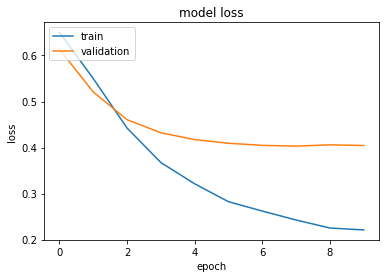

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Dropout = 0.4

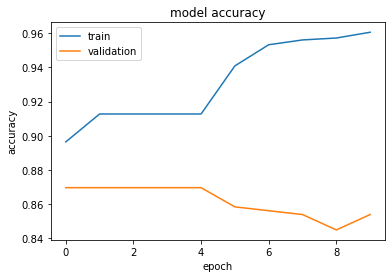

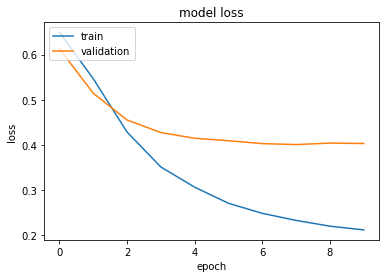

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
